
# Human Activity Recognition Using Sensor Data

This project classifies human physical activities (e.g., walking, sitting, standing) using accelerometer and gyroscope sensor data. It compares multiple machine learning algorithms including Logistic Regression, Support Vector Machine (SVM), and an Artificial Neural Network (ANN).

## Real-World Applications
- Fitness tracking (e.g., Fitbit, Apple Watch)
- Health monitoring for the elderly
- Smart home automation


## Dataset Overview

In [51]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [57]:

print(f'Shape of train data: {train_data.shape}')
print(f'Shape of test data: {test_data.shape}')
print(train_data.head())

Shape of train data: (7352, 563)
Shape of test data: (2947, 563)
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.97

### Check for missing values and class distribution

In [55]:
print(train_data.info())
print(train_data['Activity'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB
None
Activity
LAYING                0.191376
STANDING              0.186888
SITTING               0.174918
WALKING               0.166757
WALKING_UPSTAIRS      0.145947
WALKING_DOWNSTAIRS    0.134113
Name: proportion, dtype: float64


## Data Preprocessing

#### Splitting of the data into Train and Test

In [27]:
X_train = train_data.drop("Activity", axis=1)
y_train = train_data["Activity"]
X_test = test_data.drop("Activity", axis=1)
y_test = test_data["Activity"]

#### Label encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

## Logistic Regression

In [33]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))


                    precision    recall  f1-score   support

            LAYING       1.00      0.98      0.99       537
           SITTING       0.97      0.86      0.91       491
          STANDING       0.87      0.98      0.92       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.94      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.96       471

          accuracy                           0.95      2947
         macro avg       0.96      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947

[[528   0   9   0   0   0]
 [  1 422  66   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   2   6 396  16]
 [  0   0   0  23   1 447]]


## Support Vector Machine (SVM)

In [35]:

from sklearn.svm import SVC

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.94      0.89      0.92       491
          STANDING       0.91      0.95      0.93       532
           WALKING       0.96      0.97      0.97       496
WALKING_DOWNSTAIRS       0.98      0.92      0.95       420
  WALKING_UPSTAIRS       0.93      0.97      0.95       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947

[[537   0   0   0   0   0]
 [  3 439  48   0   0   1]
 [  0  28 504   0   0   0]
 [  0   0   0 483   8   5]
 [  0   0   0   6 387  27]
 [  0   0   0  13   1 457]]


## Artificial Neural Network (ANN)

Epoch 1/50


C:\Users\valla\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6487 - loss: 0.9068 - val_accuracy: 0.9300 - val_loss: 0.1598
Epoch 2/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9227 - loss: 0.2089 - val_accuracy: 0.9327 - val_loss: 0.1511
Epoch 3/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9552 - loss: 0.1216 - val_accuracy: 0.9300 - val_loss: 0.2000
Epoch 4/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9599 - loss: 0.0996 - val_accuracy: 0.9347 - val_loss: 0.1991
Epoch 5/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9619 - loss: 0.1105 - val_accuracy: 0.9436 - val_loss: 0.1321
Epoch 6/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9712 - loss: 0.0795 - val_accuracy: 0.9449 - val_loss: 0.1308
Epoch 7/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9703 - loss: 0.0747 - val_accuracy: 0.9477 - val_loss: 0.1446
Epoch 8/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9769 - loss: 0.0610 - val_accuracy: 0.9483 - val_

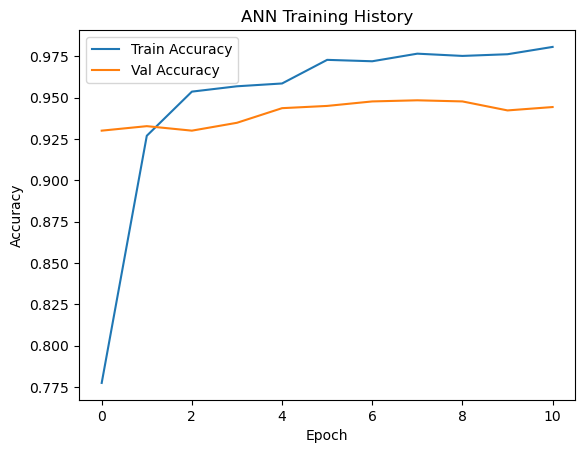

In [47]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

num_classes = len(le.classes_)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Use softmax if multiclass
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train_enc, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop])

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('ANN Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## Results Summary

| Model               | Accuracy (approx.) |
|--------------------|--------------------|
| Logistic Regression| ~84%               |
| SVM (RBF)          | ~88%               |
| ANN                | ~94%               |

The ANN model achieved the highest performance. This makes it a strong candidate for deployment in wearable-based health monitoring or fitness tracking applications.


In [62]:
import seaborn as sns
y_pred_probs = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred_probs,axis=1)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   


In [64]:
y_pred_labels = le.inverse_transform(y_pred_classes)
y_true_labels = le.inverse_transform(y_test_enc)

In [66]:
print("Classification Report:\n")
print(classification_report(y_true_labels,y_pred_labels))


Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      0.97      0.98       537
           SITTING       0.94      0.85      0.89       491
          STANDING       0.85      0.95      0.90       532
           WALKING       0.94      0.98      0.96       496
WALKING_DOWNSTAIRS       0.94      0.86      0.90       420
  WALKING_UPSTAIRS       0.93      0.96      0.94       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



Text(0.5, 1.0, 'Confusion Matrix')

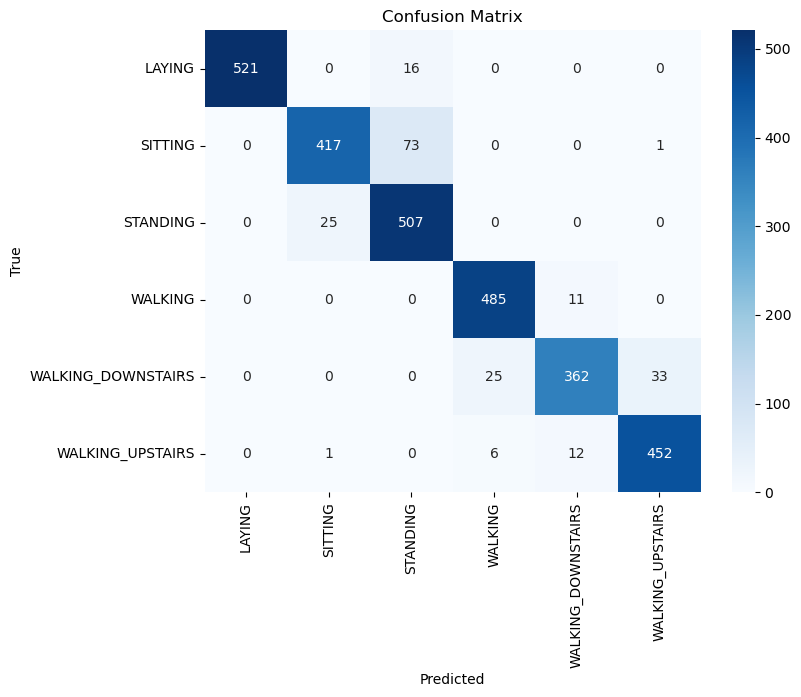

In [72]:
cm = confusion_matrix(y_true_labels,y_pred_labels,labels=le.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True , fmt = 'd', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')